In [1]:
# Install packages #
# !pip install jupyter
# !pip install numpy
# !pip install matplotlib
# !pip install math
# !pip install torch
# !pip install xlrd
# !pip install pandas
# !pip install torchvision

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import copy
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torch import Tensor
from torch.optim.optimizer import (Optimizer, required, _use_grad_for_differentiable, _default_to_fused_or_foreach,
                        _differentiable_doc, _foreach_doc, _maximize_doc)
from typing import List, Optional

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
### BMI Dataset

# Loading training data
#dataset = pd.read_csv("bmi_train.csv")
#dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True) #Gender -> boolean
#dataset = dataset.to_numpy()

# Splitting off 80% of data for training, 20% for validation
#train_split = int(0.8 * len(dataset))
#X_train = dataset[:train_split, [0,1,2]]
#y_train = dataset[:train_split, 3]
#X_test = dataset[train_split:, [0,1,2]]
#y_test = dataset[train_split:, 3]

#print(X_train)
#print(y_train)

# Loading prediction data
#prediction_dataset = pd.read_csv("bmi_validation.csv")
#prediction_dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True) #Gender -> boolean
#X_prediction = prediction_dataset.to_numpy()

# Normalize data set
#X_train_normalized = (X_train - X_train.min(0)) / (X_train.max(0) - X_train.min(0))
#X_test_normalized = (X_test - X_test.min(0)) / (X_test.max(0) - X_test.min(0))
#X_prediction_normalized = (X_prediction - X_prediction.min(0)) / (X_prediction.max(0) - X_prediction.min(0))

# Turn data to tensor
#X_train_tensor = torch.from_numpy(X_train_normalized)
#y_train_tensor = torch.from_numpy(y_train)
#X_test_tensor = torch.from_numpy(X_test_normalized)
#y_test_tensor = torch.from_numpy(y_test)
#X_prediction_tensor = torch.from_numpy(X_prediction_normalized)

In [4]:
### Epsilon Pascal Challenge Dataset

# Loading training data
#dataset = pd.read_csv("epsilon_normalized", sep=' ', header=None, nrows=20000)
#dataset = dataset.to_numpy()
#for i in range(1, dataset.shape[1]-1):
#    dataset[:, i] = [float(value.split(':')[1]) if isinstance(value, str) else value for value in dataset[:, i]]
#dataset = dataset[:, :-1]
#np.random.shuffle(dataset)

#for i in range(1, dataset.shape[0]):
#    if dataset[i - 1, 0] == -1:
#        dataset[i - 1, 0] = 0


# Splitting off data for training and validation
#train_split = int(0.8 * len(dataset))
#X_train = dataset[:train_split, 1:].astype(np.float32)
#y_train = dataset[:train_split, 0].astype(np.float32)
#X_test = dataset[train_split:, 1:].astype(np.float32)
#y_test = dataset[train_split:, 0].astype(np.float32)
#print(X_train)
#print(y_train)

# Normalize data set
#X_train_normalized = X_train
#X_test_normalized = X_test

# Turn data to tensor
#X_train_tensor = torch.from_numpy(X_train)
#y_train_tensor = torch.from_numpy(y_train)
#X_test_tensor = torch.from_numpy(X_test)
#y_test_tensor = torch.from_numpy(y_test)
#print(X_train_tensor.size())
#print(y_train_tensor.size())
#print(X_test_tensor.size())
#print(y_test_tensor.size())

In [5]:
### MNIST Dataset

# Loading training data
dataset = pd.read_csv("mnist_train.csv")
dataset = dataset.to_numpy()

# Splitting off 80% of data for training, 20% for validation
train_split = int(0.8 * len(dataset))
X_train = dataset[:train_split, 1:].astype(np.int32)
y_train = dataset[:train_split, 0].astype(np.int32)
X_test = dataset[train_split:, 1:].astype(np.int32)
y_test = dataset[train_split:, 0].astype(np.int32)

print(X_train)
print(y_train)

# Loading prediction data
prediction_dataset = pd.read_csv("mnist_test.csv")
X_prediction = prediction_dataset.to_numpy()

# Normalize data set
denominator = X_train.max(0) - X_train.min(0)
X_train_normalized = (X_train - X_train.min(0)) / np.where(denominator != 0, denominator, 1)
denominator = X_test.max(0) - X_test.min(0)
X_test_normalized = (X_test - X_test.min(0)) / np.where(denominator != 0, denominator, 1)
denominator = X_prediction.max(0) - X_prediction.min(0)
X_prediction_normalized = (X_prediction - X_prediction.min(0)) / np.where(denominator != 0, denominator, 1)
# Turn data to tensor
X_train_tensor = torch.from_numpy(X_train_normalized)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test_normalized)
y_test_tensor = torch.from_numpy(y_test)
X_prediction_tensor = torch.from_numpy(X_prediction_normalized)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 4 1 ... 0 1 2]


In [21]:
### gisette Dataset
#2 class, 6000 data points, ~5000 features

# Loading training data
dataset = pd.read_csv("gisette_scale", sep=' ', header=None)
dataset = dataset.to_numpy()
for i in range(1, dataset.shape[1]-1):
    dataset[:, i] = [float(value.split(':')[1]) if isinstance(value, str) else value for value in dataset[:, i]]
dataset = dataset[:, :-2]
np.random.shuffle(dataset)

for i in range(1, dataset.shape[0]):
    if dataset[i - 1, 0] == -1:
        dataset[i - 1, 0] = 0

#print(dataset)
#print(dataset.shape)

# Splitting off data for training and validation
train_split = int(0.8 * len(dataset))
X_train = dataset[:train_split, 1:].astype(np.float32)
y_train = dataset[:train_split, 0].astype(np.float32)
X_test = dataset[train_split:, 1:].astype(np.float32)
y_test = dataset[train_split:, 0].astype(np.float32)
#print(X_train)
#print(y_train)

# Normalize data set
denominator = X_train.max(0) - X_train.min(0)
X_train_normalized = (X_train - X_train.min(0)) / np.where(denominator != 0, denominator, 1)
denominator = X_test.max(0) - X_test.min(0)
X_test_normalized = (X_test - X_test.min(0)) / np.where(denominator != 0, denominator, 1)


print("X_train_normalized: ", X_train_normalized)
print("X_test_normalized: ", X_test_normalized)

# Turn data to tensor
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)
print(X_train_tensor.size())
print(y_train_tensor.size())
print(X_test_tensor.size())
print(y_test_tensor.size())

X_train_normalized:  [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.92592597 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
X_test_normalized:  [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.983984  ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.92592597 ... 0.         0.         0.6056055 ]]
torch.Size([4800, 4954])
torch.Size([4800])
torch.Size([1200, 4954])
to

In [6]:
# Train and test error rate analysis function
def calculate_error_rate(X, y, w, b):
    num_samples = X.shape[0]
    y_pred = np.dot(X, w) + b
    y_pred = torch.round(torch.from_numpy(y_pred))
    error_count = torch.count_nonzero(y_pred - y)
    error_rate = error_count / num_samples
    return error_rate

Custom Vanilia Gradient Descent

In [ ]:
# Vanilia Gradient Descent Algorithms
def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    
    # Initialize weights and bias
    w = np.zeros(num_features)
    b = 0

    cost_history = []
    
    for epoch in range(num_iterations):
        # Calculate predictions
        y_pred = np.dot(X, w) + b
        
        # Calculate the difference between predictions and actual values
        error = y_pred - y
        
        # Calculate the gradient
        w_gradient = (1/num_samples) * np.dot(X.T, error)
        b_gradient = (1/num_samples) * np.sum(error)
        
        # Update theta using the learning rate and gradient
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient
        
        # Calculate the cost (mean squared error)
        cost = np.mean(np.square(error))
        cost_history.append(cost)

        # Print the loss every 100 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(y_pred[1])
            print(f'Epoch [{epoch+1}/{num_iterations}], Loss: {cost.item():.8f}')
    
    return w, b, cost_history

# Train the model using gradient descent
learning_rate = 0.001
num_iterations = 100
w, b, cost_history = gradient_descent(X_train_normalized, y_train, learning_rate, num_iterations)

# Print the learned parameters
print("Learned parameters:")

for i, w_i in enumerate(w):
    print(f"w{i} =", w_i)
print("b =", b)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w, b)
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w, b)
    print("Test error rate:", test_error_rate)

Custom Stochastic Gradient Descent

2.2361821287482853
Epoch [1/10], Loss: 4.26444719
3.681250269966303
Epoch [10/10], Loss: 4.84625479
Learned parameters:
w0 = 0.0
w1 = 0.0
w2 = 0.0
w3 = 0.0
w4 = 0.0
w5 = 0.0
w6 = 0.0
w7 = 0.0
w8 = 0.0
w9 = 0.0
w10 = 0.0
w11 = 0.0
w12 = 0.000990900281483295
w13 = 0.0001353646228264518
w14 = -0.001119537335524304
w15 = -0.001119537335524304
w16 = 0.0
w17 = 0.0
w18 = 0.0
w19 = 0.0
w20 = 0.0
w21 = 0.0
w22 = 0.0
w23 = 0.0
w24 = 0.0
w25 = 0.0
w26 = 0.0
w27 = 0.0
w28 = 0.0
w29 = 0.0
w30 = 0.0
w31 = 0.0
w32 = 0.0014986690051980761
w33 = 0.0017449061370374548
w34 = 0.006020259084254055
w35 = 0.008281523323500446
w36 = 0.01275452997244562
w37 = 0.015629007778843147
w38 = 0.021883517314918857
w39 = 0.023859609365041657
w40 = 0.018437796199158616
w41 = 0.022331188072382345
w42 = 0.02885674184248017
w43 = 0.021360485726556355
w44 = 0.011484330665532835
w45 = 0.015060412011213406
w46 = 0.010782419243972911
w47 = 0.012905258098371274
w48 = 0.013977819597020371
w49 = 0.005490503977846101
w50 = 0.00173

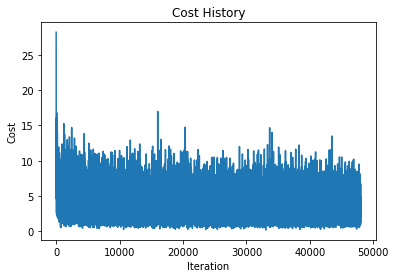

Train error rate: tensor(0.7859)
Test error rate: tensor(0.7796)


In [8]:
# Stochastic Gradient Descent Algorithms
def stochastic_gradient_descent(X, y, learning_rate, num_epochs, batch_size):
    num_samples, num_features = X.shape
    num_batches = num_samples // batch_size

    # Initialize weights and bias
    w = np.zeros(num_features)
    b = 0
    cost_history = []

    for epoch in range(num_epochs):
        # Shuffle the data for each epoch
        permutation = np.random.permutation(num_samples)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for batch in range(num_batches):
            # Select the current batch
            start = batch * batch_size
            end = (batch + 1) * batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Calculate predictions
            y_pred = np.dot(X_batch, w) + b

            # Calculate the difference between predictions and actual values
            error = y_pred - y_batch

            # Calculate the gradients
            w_gradient = (1 / batch_size) * np.dot(X_batch.T, error)
            b_gradient = (1 / batch_size) * np.sum(error)

            # Update weights and bias
            w -= learning_rate * w_gradient
            b -= learning_rate * b_gradient

            # Calculate the cost (mean squared error)
            cost = np.mean(np.square(error))
            cost_history.append(cost)

        # Print the loss every 100 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(y_pred[1])
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {cost.item():.8f}')
            
    return w, b, cost_history

# Train the model using stochastic gradient descent
learning_rate = 0.001
num_epochs = 10
batch_size = 10
w, b, cost_history = stochastic_gradient_descent(X_train_normalized, y_train, learning_rate, num_epochs, batch_size)

# Print the learned parameters
print("Learned parameters:")
for i, w_i in enumerate(w):
    print(f"w{i} =", w_i)
print("b =", b)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w, b)
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w, b)
    print("Test error rate:", test_error_rate)

Pytorch SGD

In [ ]:
# Define the learning rate and number of epochs
learning_rate = 0.0001
num_epochs = 1000

# Define the number of features
num_features = X_train_tensor.size()[1]

# Define the model parameters (weights and bias)
w = torch.zeros(num_features, dtype=torch.float, requires_grad=True)
# w = torch.tensor([1., 1., 1.], requires_grad=True)
b = torch.zeros(1, dtype=torch.float, requires_grad=True)
# b = torch.tensor([1.], requires_grad=True)
cost_history = []

# Define the loss function
criterion = torch.nn.MSELoss()

# Define the optimizer (Vanilla Gradient Descent)
optimizer = torch.optim.SGD([w, b], lr=learning_rate, weight_decay=0)

# Perform gradient descent
for epoch in range(num_epochs):
    # Forward pass
    outputs = torch.matmul(X_train_tensor.float(), w) + b
    loss = criterion(outputs, y_train_tensor.float())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the loss
    cost_history.append(loss.detach().numpy())
    
    # Print the loss every 1000 epochs
    if (epoch + 1) % 10 == 0 or epoch == 0:
        train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w.detach().numpy(), b.detach().numpy())
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Error: {train_error_rate}')
        

# Print learned parameters
print('Trained weights:', w)
print('Trained bias:', b)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w.detach().numpy(), b.detach().numpy())
print("Train error rate:", train_error_rate)
print("w detach", w.detach())
print("b detach", b.detach())
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w.detach().numpy(), b.detach().numpy())
    print("Test error rate:", test_error_rate)

Custom SGD Optimizer Class

In [28]:
class custom_optimizer_SGD(Optimizer):
    def __init__(self, params, lr=required, weight_decay=0 ):
        if lr is not required and lr < 0.0:
            raise ValueError(f"Invalid learning rate: {lr}")
        if weight_decay < 0.0:
            raise ValueError(f"Invalid weight_decay value: {weight_decay}")
        defaults = dict(lr=lr, weight_decay=weight_decay)
        super().__init__(params, defaults)
                
    def step(self):
        for group in self.param_groups:
            for param in group['params']:
                if param.grad is None:
                    continue
                grad = param.grad.data
                weight_decay = group['weight_decay']
                lr = group['lr']
                param.data.add_(-lr, grad)
                if weight_decay != 0:
                    param.data.add_(-lr * weight_decay, param.data)

Neural Network

In [29]:
# Define a custom neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, num_features=1):
        super().__init__()
        self.flatten = nn.Flatten()
        self.activation_stack = nn.Sequential(
            nn.Linear(num_features, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.activation_stack(x)
        return torch.squeeze(logits)

In [7]:
# Define the learning rate and number of epochs
learning_rate = 0.001
num_epochs = 1000

# Define the model parameters
cost_history = []

# Define neural network model, loss criterion and optimizer
criterion = torch.nn.MSELoss()
NeuralNetwork_model = NeuralNetwork(X_train_tensor.size()[1])
print(NeuralNetwork_model)
optimizer = custom_optimizer_SGD(NeuralNetwork_model.parameters(), lr=learning_rate, weight_decay = 0)

#for name, param in NeuralNetwork_model.named_parameters():
#    print( name )
#    values = torch.ones( param.shape )
#    param.data = values
    
# Perform training
NeuralNetwork_model.train()
for epoch in range(num_epochs):
    # Forward propagation to obtain the predicted output
    outputs = NeuralNetwork_model(X_train_tensor.float())
    
    # Calculate the loss
    loss = criterion(outputs, y_train_tensor.float())
    
    # Backward propagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record the loss
    cost_history.append(loss.item())
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(outputs[1])
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')
        
# Print learned parameters
for name, param in NeuralNetwork_model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')
        
# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
# train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w.T.detach().numpy(), b.detach().numpy())
# print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
# if X_test is not None and y_test is not None:
#    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w.T.detach().numpy(), b.detach().numpy())
#    print("Test error rate:", test_error_rate)

NameError: name 'X_train_tensor' is not defined

Fedearted Learning Algorithm

In [30]:
# Define a custom class for each client so they can update separately
class ClientDevice:
    def __init__(self, model, criterion, optimizer, X_train, y_train):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.X_train = X_train
        self.y_train = y_train

    def load_global_weights(self, global_weights):
        self.model.load_state_dict(global_weights)

    def get_local_weights(self):
        return self.model.state_dict()

    def update_weights(self, num_epochs):
        self.model.train()
        for epoch in range(num_epochs):
            outputs = self.model(self.X_train.float())
            self.optimizer.zero_grad()
            loss = self.criterion(outputs, self.y_train.float())
            loss.backward()
            self.optimizer.step()
        return self.model.state_dict()

# Define server wise functions
def send_client_weights(server_weights, local_weights):
    server_weights.append(local_weights)

# Total weight processing functions
def Federated_Averaging(client_weights_total):
    aggregate_weights = {}
    num_clients = len(client_weights_total)
    
    # Iterate over the parameters of the model
    for param_name in client_weights_total[0].keys():
        # Initialize the aggregated parameter tensor
        aggregated_param = client_weights_total[0][param_name].clone()

        # Sum the parameter tensors from all clients
        for client_weights in client_weights_total[1:]:
            aggregated_param += client_weights[param_name]

        # Calculate the average parameter value
        aggregated_param /= num_clients

        # Assign the averaged parameter to the aggregate_weights dictionary
        aggregate_weights[param_name] = aggregated_param

    return aggregate_weights

tensor(0.7623, grad_fn=<SelectBackward0>)
Epoch [1/5000], Loss: 0.43975198, Culminative Send Cost: 4954
tensor(0.5712, grad_fn=<SelectBackward0>)
Epoch [1000/5000], Loss: 0.08313216, Culminative Send Cost: 4954000
tensor(0.5976, grad_fn=<SelectBackward0>)
Epoch [2000/5000], Loss: 0.06045570, Culminative Send Cost: 9908000
tensor(0.6269, grad_fn=<SelectBackward0>)
Epoch [3000/5000], Loss: 0.04797012, Culminative Send Cost: 14862000
tensor(0.6491, grad_fn=<SelectBackward0>)
Epoch [4000/5000], Loss: 0.04016637, Culminative Send Cost: 19816000
tensor(0.6655, grad_fn=<SelectBackward0>)
Epoch [5000/5000], Loss: 0.03489844, Culminative Send Cost: 24770000
activation_stack.0.weight: tensor([[ 0.0050, -0.0045,  0.0075,  ..., -0.0003, -0.0051,  0.0060]])
activation_stack.0.bias: tensor([0.0071])
tensor(0.9450, grad_fn=<SelectBackward0>)
Epoch [1/5000], Loss: 0.44116411, Culminative Send Cost: 24770
tensor(0.7948, grad_fn=<SelectBackward0>)
Epoch [1000/5000], Loss: 0.08209635, Culminative Send Co

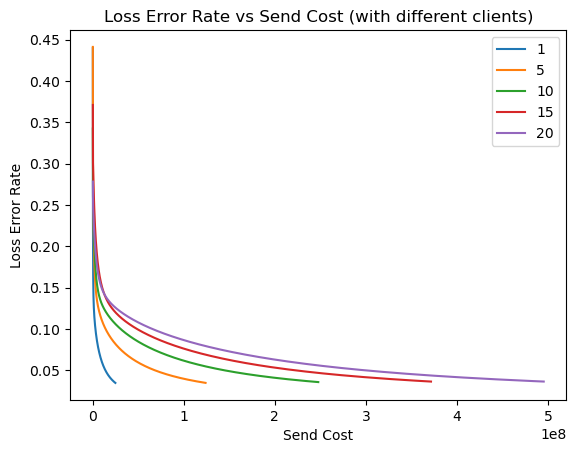

<Figure size 640x480 with 0 Axes>

In [36]:
### Experiment for num_clients

# Define the learning rate and number of epochs
learning_rate = 0.0002
num_epochs = 5000
batch_size = 1
num_clients_list = [1,5,10,15,20]
local_update_epochs_list = [1]

# Cost History Total
num_clients_list_size = len(num_clients_list)
local_update_epochs_list_size = len(local_update_epochs_list)
loss_cost_history_total = []
send_cost_history_total = []

# Compare the num_clients
local_update_epochs = local_update_epochs_list[0]
for num_clients in num_clients_list:
    #print(f'=== The training for num_clients is {num_clients} ===')
    # Define neural network model, loss criterion and optimizer
    model = NeuralNetwork(X_train_tensor.size()[1])
    criterion = torch.nn.MSELoss()
    optimizer = custom_optimizer_SGD(model.parameters(), lr=learning_rate)

    # Preprocess the client data
    X_train_client = [None] * num_clients
    y_train_client = [None] * num_clients
    client_row = math.floor( X_train_tensor.size(dim=0) / num_clients )
    for client in range(num_clients):
        X_train_client[client] = X_train_tensor[(client)*client_row : (client+1)*client_row]
        y_train_client[client] = y_train_tensor[(client)*client_row : (client+1)*client_row]
        #print(f'Client_X_train[{client}]: {X_train_client[client]}')
        #print(f'Client_y_train[{client}]: {y_train_client[client]}')

    # Establish client devices
    client_model = [None] * num_clients
    client_optimizer = [None] * num_clients
    client_device = [None] * num_clients
    client_weights = [None] * num_clients
    for client in range(num_clients):
        client_model[client] = NeuralNetwork(X_train_client[client].size()[1])
        client_optimizer[client] = custom_optimizer_SGD(client_model[client].parameters(), lr=learning_rate)
        client_device[client] = ClientDevice(client_model[client], criterion, client_optimizer[client], X_train_client[client], y_train_client[client])
        #print(client_device[client].model)

    # Cost History
    loss_cost_history = []
    send_cost_history = []
    send_cost = 0

    # Perform training
    global_weights = model.state_dict()
    #print(f'Initial global weights are: {global_weights}')
    for epoch in range(num_epochs):
        client_weights_total = []

        # Clients local update
        for client in range(num_clients):
            # Transmit the global weight to clients
            client_device[client].load_global_weights(global_weights)
            client_weights[client] = client_device[client].update_weights(local_update_epochs)

            # Send client weights to the server
            send_client_weights(client_weights_total, client_weights[client])
            client_weights_size = client_weights[client]['activation_stack.0.weight']
            send_cost = send_cost + client_weights_size.numel()

        # Aggregate client weights on the server
        aggregated_weights = Federated_Averaging(client_weights_total)

        # Update global weights with aggregated weights
        global_weights.update(aggregated_weights)
        model.load_state_dict(global_weights)

        # Record the loss
        outputs = model(X_train_tensor.float())
        loss = criterion(outputs, y_train_tensor.float())
        loss_cost_history.append(loss.item())

        # Record the send cost
        send_cost_history.append(send_cost)

        # Print the loss every 1000 epochs
        if (epoch + 1) % 1000 == 0 or epoch == 0:
            print(outputs[1])
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Culminative Send Cost: {send_cost}')

    # Print learned parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.data}')

    # Plot the cost history
    #plt.plot(loss_cost_history)
    #plt.xlabel("Iteration")
    #plt.ylabel("Cost")
    #plt.title("Cost History")
    #plt.show()

    # Plot send cost history
    #print(f'Total send cost: {send_cost}')
    #plt.plot(send_cost_history)
    #plt.xlabel("Iteration")
    #plt.ylabel("Cost")
    #plt.title("Send Cost History")
    #plt.show()

    # Record the history of loss and send_cost
    loss_cost_history_total.append(loss_cost_history)
    send_cost_history_total.append(send_cost_history)

print(f'=== The Experiment Result ===')

# Plot the error rate between cost history with clients
for i in range(num_clients_list_size):
    plt.plot(send_cost_history_total[i], loss_cost_history_total[i])
plt.xlabel("Send Cost")
plt.ylabel("Loss Error Rate")
plt.title("Loss Error Rate vs Send Cost (with different clients)")
plt.legend(num_clients_list)
plt.show()
plt.savefig("num_clients_gisette.png")

tensor(0.6986, grad_fn=<SelectBackward0>)
Epoch [1/5000], Loss: 0.38646463, Culminative Send Cost: 24770
tensor(0.8099, grad_fn=<SelectBackward0>)
Epoch [1000/5000], Loss: 0.08324654, Culminative Send Cost: 24770000
tensor(0.8349, grad_fn=<SelectBackward0>)
Epoch [2000/5000], Loss: 0.06063998, Culminative Send Cost: 49540000
tensor(0.8539, grad_fn=<SelectBackward0>)
Epoch [3000/5000], Loss: 0.04817567, Culminative Send Cost: 74310000
tensor(0.8655, grad_fn=<SelectBackward0>)
Epoch [4000/5000], Loss: 0.04035864, Culminative Send Cost: 99080000
tensor(0.8714, grad_fn=<SelectBackward0>)
Epoch [5000/5000], Loss: 0.03506194, Culminative Send Cost: 123850000
activation_stack.0.weight: tensor([[ 0.0100, -0.0028,  0.0022,  ...,  0.0003, -0.0029,  0.0069]])
activation_stack.0.bias: tensor([0.0133])
tensor(0.4431, grad_fn=<SelectBackward0>)
Epoch [1/5000], Loss: 0.30306324, Culminative Send Cost: 24770
tensor(0.8848, grad_fn=<SelectBackward0>)
Epoch [1000/5000], Loss: 0.06097631, Culminative Sen

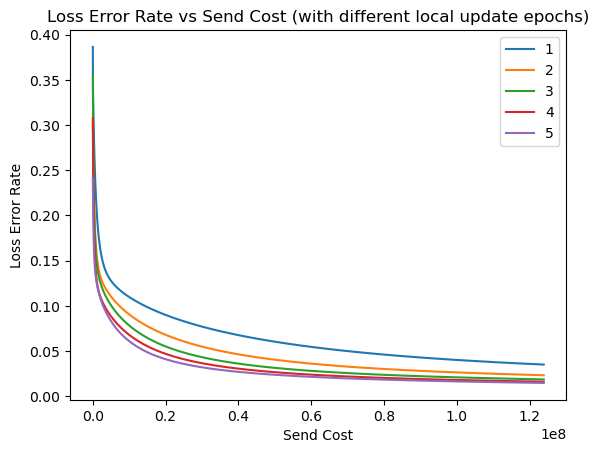

In [41]:
### Experiment for local_update_epochs

# Define the learning rate and number of epochs
learning_rate = 0.0002
num_epochs = 5000
batch_size = 1
num_clients_list = [5]
local_update_epochs_list = [1,2,3,4,5]

# Cost History Total
num_clients_list_size = len(num_clients_list)
local_update_epochs_list_size = len(local_update_epochs_list)
loss_cost_history_total = []
send_cost_history_total = []

# Compare the local_update_epochs
num_clients = num_clients_list[0]
for local_update_epochs in local_update_epochs_list:
    #print(f'=== The training for local_update_epochs is {local_update_epochs} ===')
    # Define neural network model, loss criterion and optimizer
    model = NeuralNetwork(X_train_tensor.size()[1])
    criterion = torch.nn.MSELoss()
    optimizer = custom_optimizer_SGD(model.parameters(), lr=learning_rate)

    # Preprocess the client data
    X_train_client = [None] * num_clients
    y_train_client = [None] * num_clients
    client_row = math.floor( X_train_tensor.size(dim=0) / num_clients )
    for client in range(num_clients):
        X_train_client[client] = X_train_tensor[(client)*client_row : (client+1)*client_row]
        y_train_client[client] = y_train_tensor[(client)*client_row : (client+1)*client_row]
        #print(f'Client_X_train[{client}]: {X_train_client[client]}')
        #print(f'Client_y_train[{client}]: {y_train_client[client]}')

    # Establish client devices
    client_model = [None] * num_clients
    client_optimizer = [None] * num_clients
    client_device = [None] * num_clients
    client_weights = [None] * num_clients
    for client in range(num_clients):
        client_model[client] = NeuralNetwork(X_train_client[client].size()[1])
        client_optimizer[client] = custom_optimizer_SGD(client_model[client].parameters(), lr=learning_rate)
        client_device[client] = ClientDevice(client_model[client], criterion, client_optimizer[client], X_train_client[client], y_train_client[client])
        #print(client_device[client].model)

    # Cost History
    loss_cost_history = []
    send_cost_history = []
    send_cost = 0

    # Perform training
    global_weights = model.state_dict()
    #print(f'Initial global weights are: {global_weights}')
    for epoch in range(num_epochs):
        client_weights_total = []

        # Clients local update
        for client in range(num_clients):
            # Transmit the global weight to clients
            client_device[client].load_global_weights(global_weights)
            client_weights[client] = client_device[client].update_weights(local_update_epochs)

            # Send client weights to the server
            send_client_weights(client_weights_total, client_weights[client])
            client_weights_size = client_weights[client]['activation_stack.0.weight']
            send_cost = send_cost + client_weights_size.numel()

        # Aggregate client weights on the server
        aggregated_weights = Federated_Averaging(client_weights_total)

        # Update global weights with aggregated weights
        global_weights.update(aggregated_weights)
        model.load_state_dict(global_weights)

        # Record the loss
        outputs = model(X_train_tensor.float())
        loss = criterion(outputs, y_train_tensor.float())
        loss_cost_history.append(loss.item())

        # Record the send cost
        send_cost_history.append(send_cost)

        # Print the loss every 1000 epochs
        if (epoch + 1) % 1000 == 0 or epoch == 0:
            print(outputs[1])
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Culminative Send Cost: {send_cost}')

    # Print learned parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.data}')

    # Plot the cost history
    #plt.plot(loss_cost_history)
    #plt.xlabel("Iteration")
    #plt.ylabel("Cost")
    #plt.title("Cost History")
    #plt.show()

    # Plot send cost history
    #print(f'Total send cost: {send_cost}')
    #plt.plot(send_cost_history)
    #plt.xlabel("Iteration")
    #plt.ylabel("Cost")
    #plt.title("Send Cost History")
    #plt.show()

    # Record the history of loss and send_cost
    loss_cost_history_total.append(loss_cost_history)
    send_cost_history_total.append(send_cost_history)

print(f'=== The Experiment Result ===')

# Plot the error rate between cost history with local_update_epochs
for i in range(local_update_epochs_list_size):
    plt.plot(send_cost_history_total[i], loss_cost_history_total[i])
plt.xlabel("Send Cost")
plt.ylabel("Loss Error Rate")
plt.title("Loss Error Rate vs Send Cost (with different local update epochs)")
plt.legend(local_update_epochs_list)
plt.show()